In [ ]:
"""Demo DWT and IDWT of batched, multichannel tensors

TFDWT: Fast Discrete Wavelet Transform TensorFlow Layers.
Copyright (C) 2025 Kishore Kumar Tarafdar

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""


'Demo DWT Perfect reconstruction filter banks\n\nTFDWT: Fast Discrete Wavelet Transform TensorFlow Layers.\nCopyright (C) 2025 Kishore Kumar Tarafdar\n\nThis program is free software: you can redistribute it and/or modify\nit under the terms of the GNU General Public License as published by\nthe Free Software Foundation, either version 3 of the License, or\n(at your option) any later version.\n\nThis program is distributed in the hope that it will be useful,\nbut WITHOUT ANY WARRANTY; without even the implied warranty of\nMERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the\nGNU General Public License for more details.\n\nYou should have received a copy of the GNU General Public License\nalong with this program.  If not, see <https://www.gnu.org/licenses/>.\n'

In [29]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

In [30]:
!python --version

Python 3.12.7


GPU availability?

In [31]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

TensorFlow version 2.18.0
CUDA Version: 12.5.1
Num GPUs Available:  1


1

Select one GPU

        Restrict code to use a particular GPU...

In [32]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [33]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


In [34]:
import TFDWT
TFDWT.__version__

'0.0.2'

## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [35]:
from TFDWT.DWTIDWT1Dv1 import DWT1D, IDWT1D

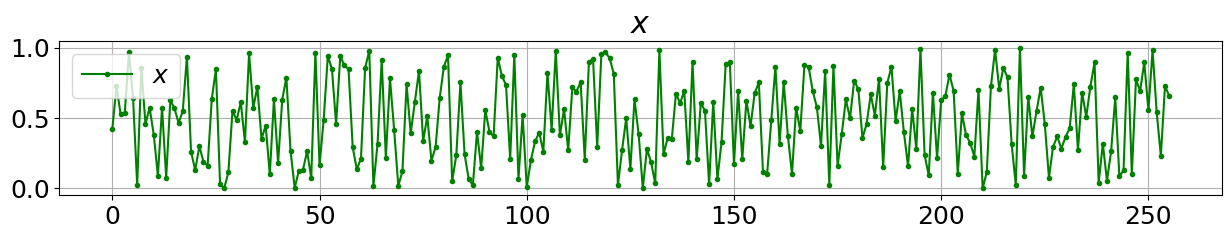

Raw x shape (256,)


In [36]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [37]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 6.3287002e-01 -1.2591761e-01]
  [ 9.9166143e-01 -1.2375867e-01]
  [ 1.1747341e+00  2.0917839e-01]
  [ 6.4986408e-02 -3.0839738e-01]
  [ 1.1798004e+00 -3.0650118e-01]
  [ 8.1846499e-01 -3.6011636e-02]
  [ 5.3965002e-01  3.1002358e-01]
  [ 3.4293404e-01  2.9269755e-01]
  [ 6.7853314e-01 -4.1636974e-02]
  [ 1.3204046e+00  2.4133840e-01]
  [-2.4123549e-02  4.4306844e-02]
  [ 4.1490871e-01 -6.4301856e-02]
  [ 4.7863394e-01  1.3517541e-01]
  [ 7.0253766e-01 -3.2174903e-01]
  [-8.2944021e-02 -3.3462115e-02]
  [ 8.4323514e-01 -1.2307888e-01]
  [ 4.8726374e-01 -2.3450097e-01]
  [ 1.2509873e+00 -2.7474162e-01]
  [ 7.7704269e-01 -1.7419288e-01]
  [ 2.3023590e-01 -2.3378190e-01]
  [ 6.0387129e-01 -3.3385125e-01]
  [ 1.3451064e+00  6.8248600e-02]
  [-3.3767551e-02 -2.1501020e-02]
  [ 1.7534523e-01 -4.0653862e-02]
  [-2.9826377e-02 -2.4802744e-01]
  [ 1.0005245e+00 -4.9712628e-01]
  [ 1.1584460e+00  1.2042034e-01]
  [ 7.1589559e-01 -2.0556

    IDWT 1D

IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[4.21132147e-01]
  [7.24531829e-01]
  [5.28351903e-01]
  [5.32676935e-01]
  [9.65387046e-01]
  [6.43190384e-01]
  [2.42851675e-02]
  [8.53230298e-01]
  [4.58007604e-01]
  [5.72449386e-01]
  [3.81648123e-01]
  [8.93164873e-02]
  [5.72160780e-01]
  [7.64230341e-02]
  [6.26990557e-01]
  [5.68116188e-01]
  [4.63774592e-01]
  [5.49500227e-01]
  [9.36299026e-01]
  [2.58954823e-01]
  [1.30281389e-01]
  [2.99641311e-01]
  [1.88655749e-01]
  [1.61070868e-01]
  [6.35156870e-01]
  [8.46246243e-01]
  [2.84785405e-02]
  [1.94104761e-03]
  [1.13099635e-01]
  [5.51244617e-01]
  [4.85693544e-01]
  [6.12685800e-01]
  [3.27966005e-01]
  [9.58071887e-01]
  [5.70978224e-01]
  [7.20858097e-01]
  [3.50684404e-01]
  [4.45840716e-01]
  [9.89224911e-02]
  [6.32399797e-01]
  [1.79802328e-01]
  [6.29677892e-01]
  [7.87371397e-01]
  [2.66810298e-01]
  [4.65703756e-03]
  [1.22539707e-01]
  [1.32289261e-01]
  [2.63878644e-01]
  [7.37394691e-02]
  [9.64926720e-01]
  

([<matplotlib.lines.Line2D at 0x7f8f882d33e0>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

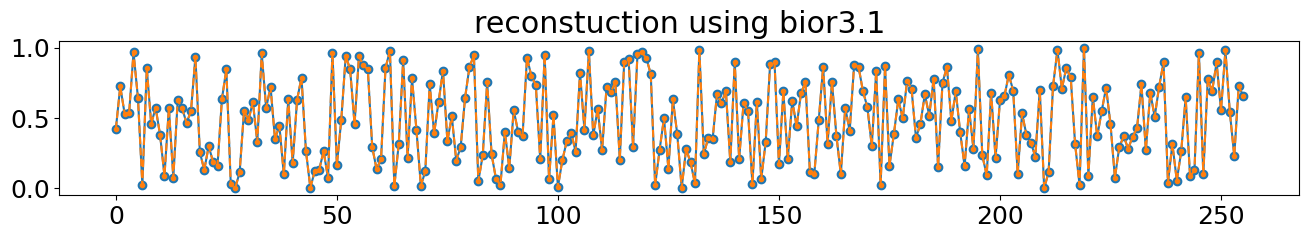

In [38]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [39]:
from TFDWT.DWTIDWT2Dv1 import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

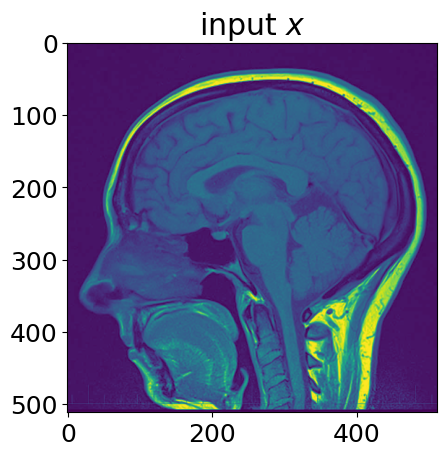

In [40]:
import cv2
x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

raw x shape: (256, 256)


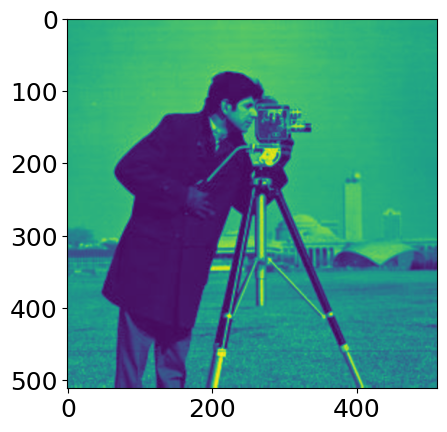

In [41]:
x1 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/cameraman.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x1.shape)
x1 = cv2.resize(x1, (512,512))
# print('x shape:', x.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x1,label='$x$')

raw x shape: (256, 256)
x shape: (512, 512)


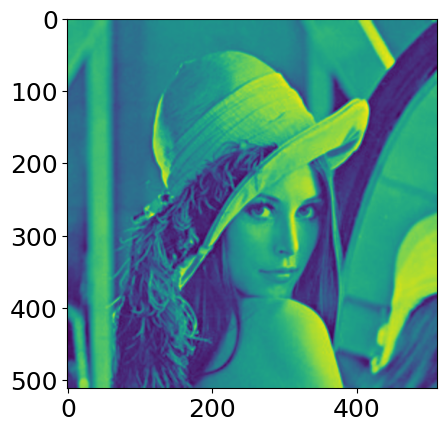

In [42]:
x2 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/lena.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x2.shape)
x2 = cv2.resize(x2, (512,512))
print('x shape:', x2.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x2,label='$x$')

    Sample input for 2D TensorFlow layer

In [43]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.expand_dims(tf.expand_dims(x1, axis=-1), axis=0)
xnew1.shape

xnew2 = tf.expand_dims(tf.expand_dims(x2, axis=-1), axis=0)
xnew2.shape


# xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
# xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)/255
xnew1 = tf.cast(xnew1, dtype=tf.float32)/255
xnew2 = tf.cast(xnew2, dtype=tf.float32)/255
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))
print(tf.reduce_min(xnew1)), print(tf.reduce_max(xnew1))
print(tf.reduce_min(xnew2)), print(tf.reduce_max(xnew2))

_1 = tf.concat([xnew,xnew1,xnew2],axis=-1)
_2 = tf.concat([xnew2,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.003921569, shape=(), dtype=float32)
tf.Tensor(0.99215686, shape=(), dtype=float32)
tf.Tensor(0.09803922, shape=(), dtype=float32)
tf.Tensor(0.9254902, shape=(), dtype=float32)


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

In [44]:
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


(None, None)

    DWT 2D

(2, 256, 256, 12)
tf.Tensor(-0.31083655, shape=(), dtype=float32)
tf.Tensor(2.4014206, shape=(), dtype=float32)


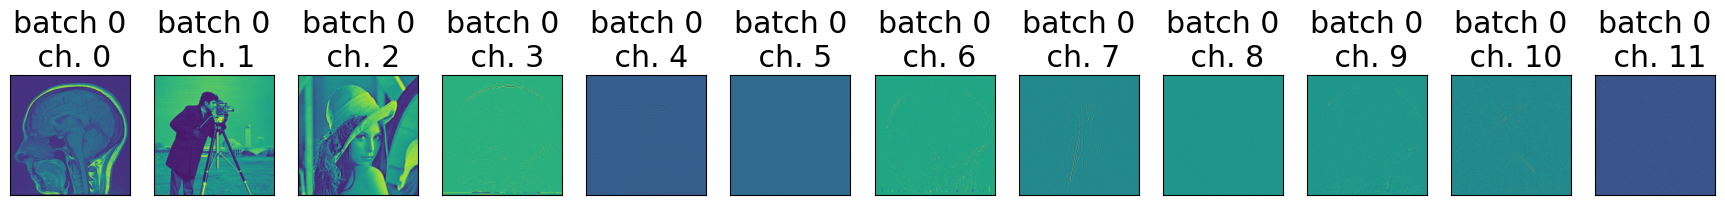

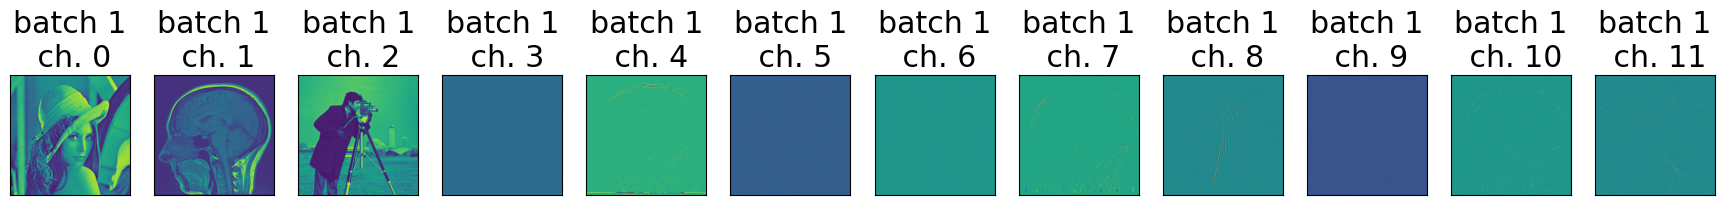

In [45]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
print(tf.reduce_min(coeffs)), print(tf.reduce_max(coeffs))
# import matplotlib.pyplot as plt

def plotall(_, thresh=0):
    # _ = coeffs
    for b in range(_.shape[0]):
        plt.figure(figsize=(22,8))
        for c in range(_.shape[-1]):
            plt.subplot(1, _.shape[-1], c+1), 
            if thresh==0:
                plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\n ch. {c}')
            else:
                plt.imshow(_[b,:,:,c]>thresh), plt.title(f'batch {b}\n ch. {c}')
            plt.xticks([])
            plt.yticks([])
        plt.show()
plotall(coeffs, 0)    

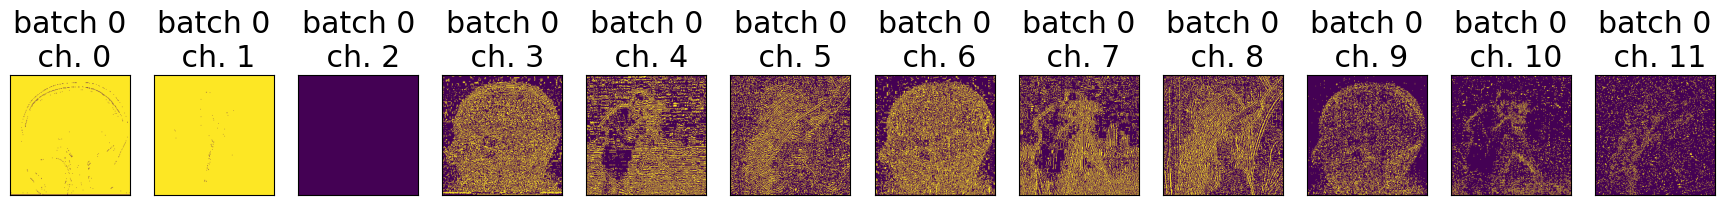

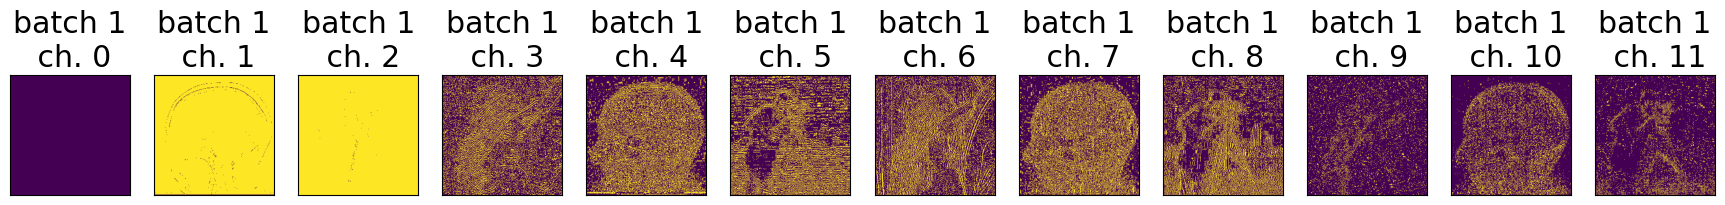

In [46]:
plotall(coeffs, 0.001) 

In [47]:
coeffs.shape

TensorShape([2, 256, 256, 12])

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


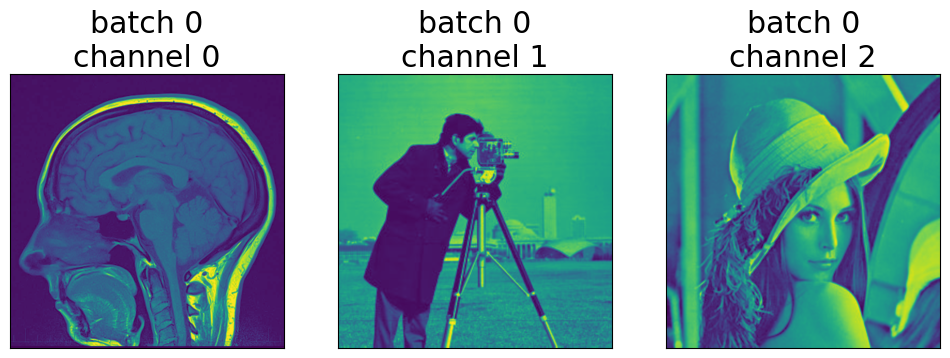

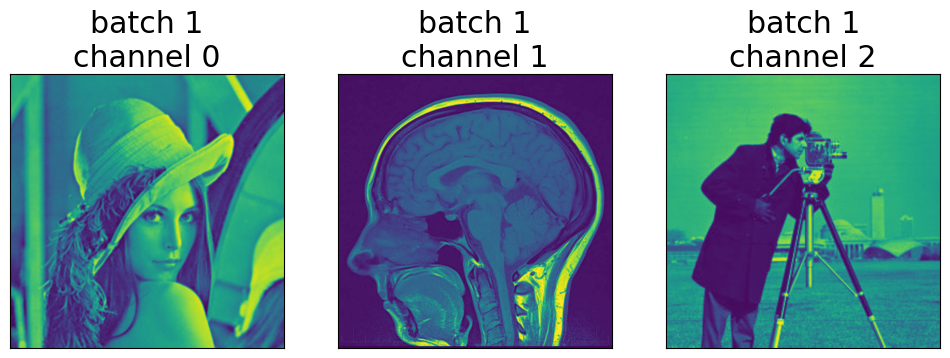

In [48]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\nchannel {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [49]:
xnew.shape, out.shape, tf.reduce_sum(tf.square(xnew)), tf.reduce_sum(tf.square(out))

(TensorShape([2, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.6875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332183.4375>)

In [50]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

## 3D: DWT, IDWT \& Perfect Reconstruction


In [51]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src/TFDWT.pypi/TFDWT'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from DWTIDWT3Dv1 import DWT3D, IDWT3D

In [52]:
# from TFDWT.DWTIDWT3Dv1 import DWT3D, IDWT3D

In [53]:
x3d = tf.random.uniform((2, 16, 16, 16, 3))

In [54]:
LLLLLHLHLLHHHLLHLHHHLHHH = DWT3D(wave=wave)(x3d)      # Analysis
x_hat = IDWT3D(wave=wave)(LLLLLHLHLLHHHLLHLHHHLHHH) # Synthesis

Biothogonal wavelet bior3.1


In [55]:
x_hat.shape, LLLLLHLHLLHHHLLHLHHHLHHH.shape

(TensorShape([2, 16, 16, 16, 3]), TensorShape([2, 8, 8, 8, 24]))